In [104]:
import numpy as np
from scipy.interpolate import LinearNDInterpolator
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

from discretize import TensorMesh
from discretize.utils import mkvc, active_from_xyz
from simpeg.utils import plot2Ddata, model_builder
from simpeg import maps
from simpeg.potential_fields import magnetics

write_output = False

import torch 



# Modelo A

### El modelo A corresponde al Área Geotérmica del Cerro Machín y fue creado en el marco del P8091 mediante la digitalización de secciones transversales de un modelo geológico de densidad obtenido partir de la inversión de datos gravimétricos adquiridos por Beltrán (2020), en el reporte técnico "Gravimetría y magnetometría del área geotérmica del volcán Cerro Machín". Las secciones transversales fueron interpoladas en la biblioteca de Python "Gempy" obteniendo así un modelo tridimensional que representa capas volcánicas poco profundas resultantes de eventos volcánicos, un conducto volcánico que se conecta con una cámara magmática profunda y un basamento de mayor densidad. Tiene unas dimensiones de X=12000 m, Y=11000 m y Z=9000 m y un origen en Este=4729200, Norte=2047800, m.s.n.m=-3500.

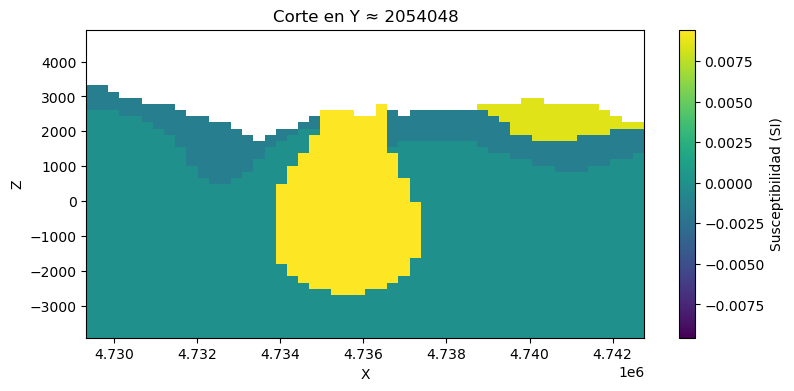

In [105]:
import numpy as np
import matplotlib.pyplot as plt

model_npz = np.load("modelA/mag_modelA.npz")
model = model_npz["Mag_model"]         
centers = model_npz["cell_centers"]    


xs = np.unique(centers[:, 0]); ys = np.unique(centers[:, 1]); zs = np.unique(centers[:, 2])
nx, ny, nz = len(xs), len(ys), len(zs)


vol = model.reshape((nx, ny, nz), order="F")  


target_y = 2054000
y_idx = np.abs(ys - target_y).argmin()
y_val = ys[y_idx]


slice_y = vol[:, y_idx, :]  

plt.figure(figsize=(9,4))
im = plt.imshow(
    slice_y.T,
    origin="lower",
    cmap="viridis",
    extent=[xs.min(), xs.max(), zs.min(), zs.max()],
    aspect="auto",
    clim=(np.nanmin(model), np.nanmax(model))
)
plt.colorbar(im, label="Susceptibilidad (SI)")
plt.title(f"Corte en Y ≈ {y_val:.0f}")
plt.xlabel("X")
plt.ylabel("Z")
plt.show()


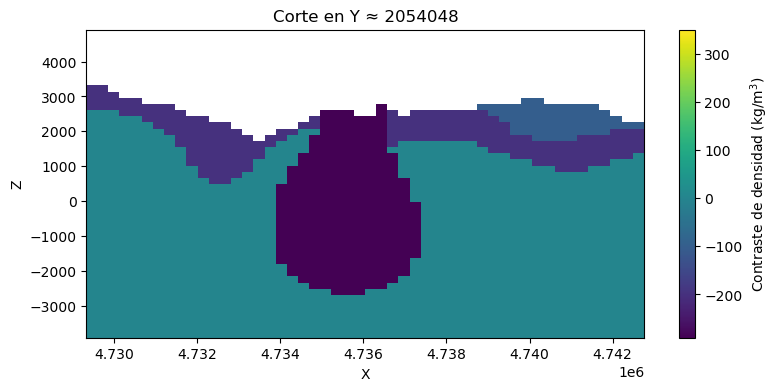

In [106]:
import numpy as np
import matplotlib.pyplot as plt

model_npz = np.load("modelA/grav_modelA.npz")
model = model_npz["Grav_model"]        * 1000
centers = model_npz["cell_centers"]    


xs = np.unique(centers[:, 0]); ys = np.unique(centers[:, 1]); zs = np.unique(centers[:, 2])
nx, ny, nz = len(xs), len(ys), len(zs)

vol = model.reshape((nx, ny, nz), order="F") 


target_y = 2054000
y_idx = np.abs(ys - target_y).argmin()
y_val = ys[y_idx]


slice_y = vol[:, y_idx, :]  

plt.figure(figsize=(9,4))
im = plt.imshow(
    slice_y.T,
    origin="lower",
    cmap="viridis",
    extent=[xs.min(), xs.max(), zs.min(), zs.max()],
    aspect="auto",
    clim=(np.nanmin(model), np.nanmax(model))
)
plt.colorbar(im, label="Contraste de densidad (kg/m$^3$)")
plt.title(f"Corte en Y ≈ {y_val:.0f}")
plt.xlabel("X")
plt.ylabel("Z")
plt.show()

<img src="https://blogger.googleusercontent.com/img/a/AVvXsEhaRNlYjCrxHo9nMg2Y_twebwJU3TfASUDOEUm_KuoSGoBMcrRuuA2PQj-oaDK83CUlETSkWYTYf1uQ2ajj9ZrGFVv7oyhqwKsVrLb3spU5sM7KNAt0xydKghjkCccduiSzZMOZ37LkApCK4f44HK8jlLpxVOJ9uJpzW-D8TzGL1pEfgT2r-Brju547mELA" width="45%" style="max-width: 1000px;">

In [107]:
# model.shape
centers.shape

(125000, 3)

# Modelo B

### El modelo B corresponde al Área Geotérmica del Cerro Machín y fue creado en el marco del proyecto 8091 mediante la digitalización de secciones transversales de un modelo geológico de resistividad propuesto por Herrera (2020), en el reporte técnico "Caracterización magnetotelúrica del área geotérmica de Cerro Machín" obtenido a partir de la inversión de datos magnetotelúricos. El modelo se creó a partir de los 7 secciones trasversales y paralelas, en sentido O-E que se proponen en la página 74 del reporte técnico mencionado, las cuales  fueron interpoladas en la biblioteca de Python "Gempy". A través de este proceso se obtuvo un modelo tridimensional que representa cuerpos volcánicos poco profundos asociados con la cámara magmática, un conducto volcánico y zonas de recarga. Tiene unas dimensiones de X=12000 m, Y=11000 m y Z=9000 m y un origen en Este=4729200, Norte=2047800, m.s.n.m=-3500.

#### La imagen que se aprecia correponde a la sección transversal #6 de la figura 50, que corresponde a la sección 6, en la página 74.

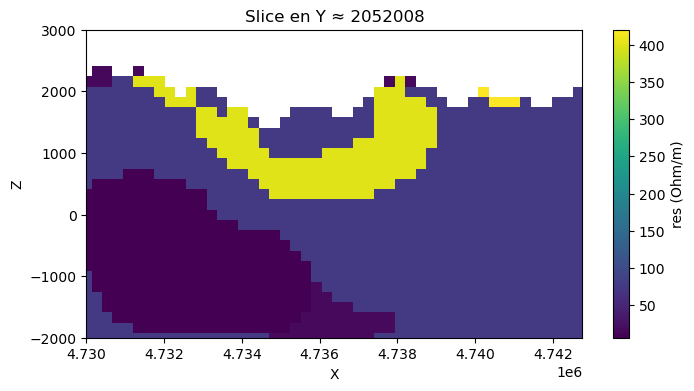

In [127]:
import numpy as np
import matplotlib.pyplot as plt

model_npz = np.load("modelB/res_modelB.npz")
model = model_npz["Res_model"]
centers = model_npz["cell_centers"]

xs = np.unique(centers[:, 0]); ys = np.unique(centers[:, 1]); zs = np.unique(centers[:, 2])
nx, ny, nz = len(xs), len(ys), len(zs)

vol = model.reshape((nz, ny, nx), order="F") 

target_y = 2052100
y_idx = np.abs(ys - target_y).argmin()
y_val = ys[y_idx]

slice_y = vol[:, y_idx, :]


plt.figure(figsize=(8,4))
im = plt.imshow(
    slice_y.T,
    origin="lower",
    cmap="viridis",
    extent=[xs.min(), xs.max(), zs.min(), zs.max()],
    aspect="auto",
    clim=(np.nanmin(model), np.nanmax(model))
)

plt.colorbar(im, label="res (Ohm/m)")
plt.title(f"Slice en Y ≈ {y_val:.0f}")
plt.xlabel("X")
plt.ylabel("Z")
plt.ylim(-2000, 3000)
plt.xlim(4730000, )
plt.show()




<img src="https://blogger.googleusercontent.com/img/a/AVvXsEiWMtz9eAcIkliDt1SNMAGBewEMImcxR2qmxVQZ3HElVKcVg8jlHksK6CKsqeZct8ZO-sYyja3nkHStGn0p_cq6PsDKmlHlz--cqxGEzULYOFC61l2w7VaATQrychR2fIF9rjjuACDbZKlsv8RHCQ9OTxZyvHs1wI-QvQcw54YLopKqCAxYhPDZhw1iZIGB" width="40%">

In [109]:
# model.shape
centers.shape

(125000, 3)

# Modelo C

### El modelo C corresponde al Área Geotérmica del Puracé y fue creado en el marco del P8091 mediante la digitalización de secciones transversales de un modelo geológico de densidad obtenido partir de la inversión de datos gravimétricos adquiridos por Ponce, et al. (2024), en el artículo "Modelo de la estructura interna del volcán Puracé y la Cadena Volcánica de Los Coconucos (Colombia), a partir de datos gravimétricos y magnéticos", con el siguiente enlace: http://www.scielo.org.co/scielo.php?pid=S0120-02832024000100013&script=sci_arttext . El modelo se construyó a partir de 2 secciones transversales en sentido SW-NE y SE-NW presentadas en la sección de resultados en las páginas 26 y 27 del documento. Estas secciones transversales fueron interpoladas en la biblioteca de Python "Gempy" obteniendo así un modelo tridimensional que representa capas volcánicas someras resultantes de eventos volcánicos, un conducto volcánico relacionado a zonas de alteración y conectadas a una cámara magmética profunda. Tiene unas dimensiones de X=18000 m, Y=20000 m y Z=8500 m y un origen en Este=4609667.74, Norte=1800295.19, m.s.n.m=-3500.


#### La imagen presentada corresponde a la seccion transversal SW-NE de la figura 12 de la subsección de "Modelos 2D", en la página 27 

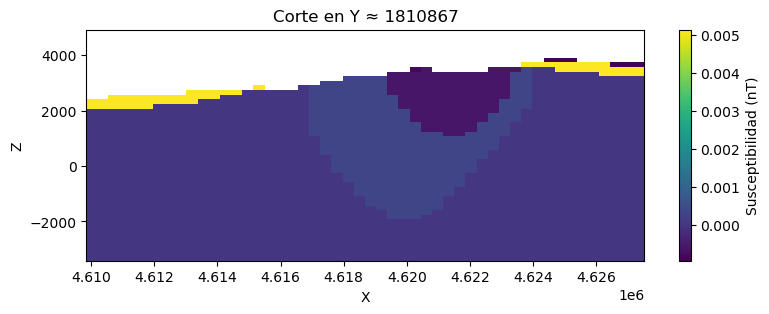

In [110]:
import numpy as np
import matplotlib.pyplot as plt

model_npz = np.load("modelC/mag_modelC.npz")
model = model_npz["Mag_model"]         
centers = model_npz["cell_centers"]    


xs = np.unique(centers[:, 0]); ys = np.unique(centers[:, 1]); zs = np.unique(centers[:, 2])
nx, ny, nz = len(xs), len(ys), len(zs)


vol = model.reshape((nx, ny, nz), order="F")  


target_y = 1810995
y_idx = np.abs(ys - target_y).argmin()
y_val = ys[y_idx]


slice_y = vol[:, y_idx, :]  

plt.figure(figsize=(9,3))
im = plt.imshow(
    slice_y.T,
    origin="lower",
    cmap="viridis",
    extent=[xs.min(), xs.max(), zs.min(), zs.max()],
    aspect="auto",
    clim=(np.nanmin(model), np.nanmax(model))
)
plt.colorbar(im, label="Susceptibilidad (nT)")
plt.title(f"Corte en Y ≈ {y_val:.0f}")
plt.xlabel("X")
plt.ylabel("Z")
plt.show()


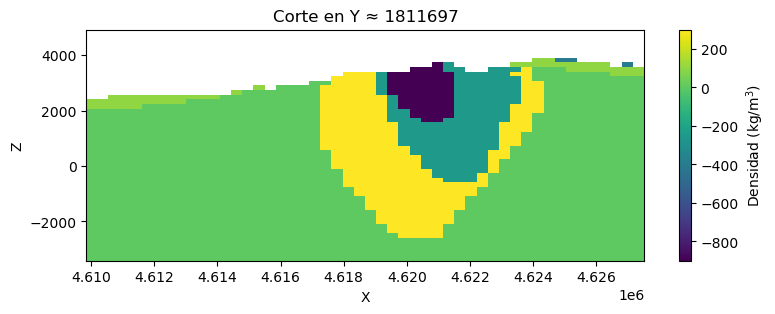

In [111]:
import numpy as np
import matplotlib.pyplot as plt

model_npz = np.load("modelC/grav_modelC.npz")
model = model_npz["Grav_model"]        * 1000
centers = model_npz["cell_centers"]    


xs = np.unique(centers[:, 0]); ys = np.unique(centers[:, 1]); zs = np.unique(centers[:, 2])
nx, ny, nz = len(xs), len(ys), len(zs)

vol = model.reshape((nx, ny, nz), order="F") 


target_y = 1811595
y_idx = np.abs(ys - target_y).argmin()
y_val = ys[y_idx]


slice_y = vol[:, y_idx, :]  

plt.figure(figsize=(9,3))
im = plt.imshow(
    slice_y.T,
    origin="lower",
    cmap="viridis",
    extent=[xs.min(), xs.max(), zs.min(), zs.max()],
    aspect="auto",
    clim=(np.nanmin(model), np.nanmax(model))
)
plt.colorbar(im, label="Densidad (kg/m$^3$)")
plt.title(f"Corte en Y ≈ {y_val:.0f}")
plt.xlabel("X")
plt.ylabel("Z")
plt.show()


<img src="https://blogger.googleusercontent.com/img/a/AVvXsEhXrlH_cRIZm0UA75Q4tsF5gvJp6zQpe90MBksIctqlXQgmVqE9RVP87-J4TYb7voDIRtpKjMikkm9oXFtBSi42je4lEfSCzPC-Bj8mFIR-sovOrKAUdH7t3stDIvEL8gimPR9PF9EHZ3JZRvPn-pCQOmY7HOt86HTMOi4i03uY7XFMeZIRDqsN0DzL4eqV=w640-h202">

In [112]:
# model.shape
centers.shape

(125000, 3)

# Modelo D

### El modelo D corresponde al Área Geotérmica del Azufral y fue creado en el marco del P8091 mediante la digitalización de secciones transversales de un modelo geológico de densidad obtenido partir de la inversión de datos gravimétricos adquiridos por Ponce (2013), en el documento "Exploración de Recursos Geotérmicos del Volcán Azufral a partir de la Interpretación de Anomalías de Campos Potenciales", con el siguiente enlace: https://repositorio.unal.edu.co/items/aa484127-e9ee-4500-8335-019280946f79. Para la construcción del modelo se usaron 9 secciones trasversales, presentadas en la sección de 5 "Modelamiento inverso del subsuelo" (página 99) las cuales fueron interpoladas en la biblioteca de Python "Gempy". De este proceso, se obtuvo un modelo tridimensional que representa capas volcánicas someras resultantes de eventos volcánicos y una serie de estructuras volcánicas y cuerpos que representan áreas de alteración hidrotermal y capas sello. Tiene unas dimensiones de X=20000 m, Y=19000 m y Z=6000 m y un origen en Este=4466965.86, Norte=1662477.77, m.s.n.m=-500.

#### La imagen que se aprecia correponde a la sección transversal #8 de la subsección 5.8, en la página 114.

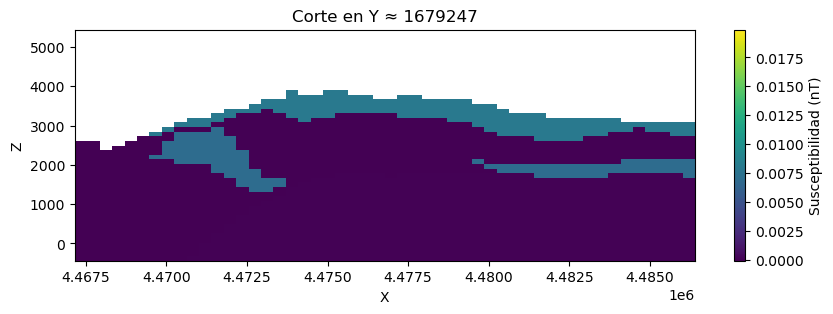

In [113]:
import numpy as np
import matplotlib.pyplot as plt

model_npz = np.load("modelD/mag_modelD.npz")
model = model_npz["Mag_model"]         # (N,)
centers = model_npz["cell_centers"]    # (N, 3)


xs = np.unique(centers[:, 0]); ys = np.unique(centers[:, 1]); zs = np.unique(centers[:, 2])
nx, ny, nz = len(xs), len(ys), len(zs)


vol = model.reshape((nx, ny, nz), order="F")  


target_y = 1679000
y_idx = np.abs(ys - target_y).argmin()
y_val = ys[y_idx]


slice_y = vol[:, y_idx, :]  

plt.figure(figsize=(10,3))
im = plt.imshow(
    slice_y.T,
    origin="lower",
    cmap="viridis",
    extent=[xs.min(), xs.max(), zs.min(), zs.max()],
    aspect="auto",
    clim=(np.nanmin(model), np.nanmax(model))
)
plt.colorbar(im, label="Susceptibilidad (nT)")
plt.title(f"Corte en Y ≈ {y_val:.0f}")
plt.xlabel("X")
plt.ylabel("Z")
plt.show()

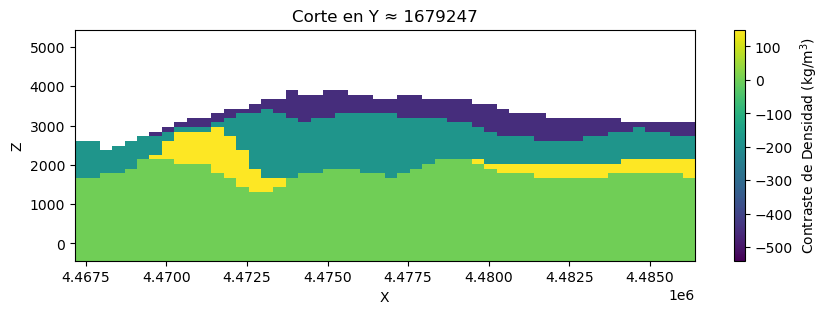

In [123]:
import numpy as np
import matplotlib.pyplot as plt

model_npz = np.load("modelD/grav_modelD.npz")
model = model_npz["Grav_model"]  * 1000       # (N,) 
centers = model_npz["cell_centers"]    # (N, 3)


xs = np.unique(centers[:, 0]); ys = np.unique(centers[:, 1]); zs = np.unique(centers[:, 2])
nx, ny, nz = len(xs), len(ys), len(zs)

vol = model.reshape((nx, ny, nz), order="F") 


target_y = 1679000
y_idx = np.abs(ys - target_y).argmin()
y_val = ys[y_idx]


slice_y = vol[:, y_idx, :]  

plt.figure(figsize=(10,3))
im = plt.imshow(
    slice_y.T,
    origin="lower",
    cmap="viridis",
    extent=[xs.min(), xs.max(), zs.min(), zs.max()],
    aspect="auto",
    clim=(np.nanmin(model), np.nanmax(model))
)
plt.colorbar(im, label="Contraste de Densidad (kg/m$^3$)")
plt.title(f"Corte en Y ≈ {y_val:.0f}")
plt.xlabel("X")
plt.ylabel("Z")
plt.show()


<img src="https://blogger.googleusercontent.com/img/a/AVvXsEi2kb2oW_c___1duvdA75-bLPoWRYhNiwMxlHUKcIU0kcFQjT5dvk5Hu1Bs4HIIgvvAsiwaQo2yh2y2zdJxc-6dzEukAKYy0qXVugtM9ucV8m_Mo6LVtSUSP4ux0C0t7qI__gDBRaXrvbli0-BKZwjXfHKqi6E-gbpwQe0v3eJGGjWXSehGgqYKM4VpsOUu">

In [115]:
# model.shape
centers.shape

(125000, 3)

# Modelo E

### El modelo E corresponde al Área Geotérmica del Cerro Machín y fue tomado de Moreno et al. (2025): https://noesis.uis.edu.co/handle/20.500.14071/46521. Este modelo tridimensional de contraste de densidad y sucseptibilidad magnética fue obtenido a través de la inversión de los datos de gravimetría y magnetometría adquiridos por Beltrán (2020), en el reporte técnico "Gravimetría y magnetometría del área geotérmica del volcán Cerro Machín". Las secciones transversales fueron interpoladas en la biblioteca de Python "Gempy" obteniendo así un modelo tridimensional que representa capas volcánicas poco profundas resultantes de eventos volcánicos, un conducto volcánico que se conecta con una cámara magmática profunda y un basamento de mayor densidad. Tiene unas dimensiones de X=13000 m, Y=11000 m y Z=10125 m y un origen en Este=4729500, Norte=2048000, m.s.n.m=-6000.

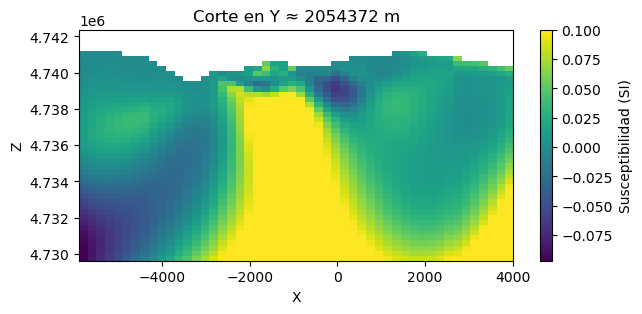

In [116]:
import numpy as np
import matplotlib.pyplot as plt

model_npz = np.load("modelE/Inv_Mag_AGCM/mag_modelE.npz")
model = model_npz["Mag_model"]         
centers = model_npz["cell_centers"]    


xs = np.unique(centers[:, 0]); ys = np.unique(centers[:, 1]); zs = np.unique(centers[:, 2])
nx, ny, nz = len(xs), len(ys), len(zs)


vol = model.reshape((nx, ny, nz), order="F")


target_y = 2054372
y_idx = np.abs(ys - target_y).argmin()
y_val = ys[y_idx]


slice_y = vol[:, y_idx, :] 

plt.figure(figsize=(7,3))
im = plt.imshow(
    slice_y.T,
    origin="lower",
    cmap="viridis",
    extent=[zs.min(), zs.max(), xs.min(), xs.max()], 
    aspect="auto"
)
plt.colorbar(im, label="Susceptibilidad (SI)")
plt.title(f"Corte en Y ≈ {target_y:.0f} m")
plt.xlabel("X")
plt.ylabel("Z")
plt.show()

<img src="https://blogger.googleusercontent.com/img/a/AVvXsEgxnijr3OyBP7DjkxS6w8gSDX5RkbzaC90ru4WeGiDARGVly7ejeAmBLVcQr96pKNijPhr_0iMpRcjDtglGhvBAxMMd2pZxWSDiSqzdQp5sFwChod-hi1DX11qNemyF5UuJNibDsOog6sg8E4KXkjxul11d_aGU0T1FAIcY9z5XXl5q8kMbNnmRYETobGns" width="45%" style="max-width: 1000px;">

In [117]:
# model.shape
centers.shape

(90000, 3)

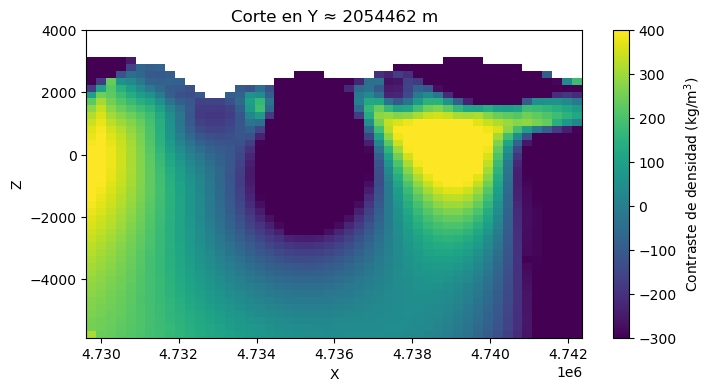

In [125]:
import numpy as np
import matplotlib.pyplot as plt

model_npz = np.load("modelE/Inv_Grav_AGCM/grav_modelE.npz")
model = model_npz["Grav_model"]     * 1000    
centers = model_npz["cell_centers"]    


xs = np.unique(centers[:, 0]); ys = np.unique(centers[:, 1]); zs = np.unique(centers[:, 2])
nx, ny, nz = len(xs), len(ys), len(zs)


vol = model.reshape((nx, ny, nz), order="F")  


target_y = 2054372
y_idx = np.abs(ys - target_y).argmin()
y_val = ys[y_idx]


slice_y = vol[:, y_idx, :]  

plt.figure(figsize=(8,4))
im = plt.imshow(
    slice_y.T, 
    origin="lower",
    cmap="viridis",
    extent=[xs.min(), xs.max(), zs.min(), zs.max()],
    aspect="auto"
)
plt.colorbar(im, label="Contraste de densidad (kg/m$^3$)")
plt.title(f"Corte en Y ≈ {y_val:.0f} m")
plt.xlabel("X")
plt.ylabel("Z")
plt.show()

<img src="https://blogger.googleusercontent.com/img/a/AVvXsEhaRNlYjCrxHo9nMg2Y_twebwJU3TfASUDOEUm_KuoSGoBMcrRuuA2PQj-oaDK83CUlETSkWYTYf1uQ2ajj9ZrGFVv7oyhqwKsVrLb3spU5sM7KNAt0xydKghjkCccduiSzZMOZ37LkApCK4f44HK8jlLpxVOJ9uJpzW-D8TzGL1pEfgT2r-Brju547mELA" width="45%" style="max-width: 1000px;">

In [119]:
# model.shape
centers.shape

(90000, 3)